In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
# Load the dataset
data = pd.read_csv(r'C:\Users\chavv\Downloads\archive (12)\Crop_recommendation.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [6]:
# Drop rows with missing values
data = data.dropna()

# Check for the columns and target variable
print(data.columns)

# Split features (X) and target (y)
X = data.drop('label', axis=1)  # Assuming 'label' is the target column
y = data['label']


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9636363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.0

In [10]:
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_gnb = gnb_model.predict(X_test_scaled)

# Evaluate the model
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))


Gaussian Naive Bayes Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.

In [11]:
# Define the hyperparameters grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],   # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)

# Fit the model
grid_search_lr.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)

# Predict with the best model
y_pred_best_lr = grid_search_lr.best_estimator_.predict(X_test_scaled)

# Evaluate the model
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best_lr))
print(classification_report(y_test, y_pred_best_lr))


Best Hyperparameters for Logistic Regression: {'C': 10, 'solver': 'saga'}
Tuned Logistic Regression Accuracy: 0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   mus

In [12]:
# Gaussian Naive Bayes doesn't typically require hyperparameter tuning,
# but we can perform a simple grid search for Naive Bayes' 'var_smoothing' parameter
param_grid_gnb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Initialize GridSearchCV for Gaussian Naive Bayes
grid_search_gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5)

# Fit the model
grid_search_gnb.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Hyperparameters for Gaussian Naive Bayes:", grid_search_gnb.best_params_)

# Predict with the best model
y_pred_best_gnb = grid_search_gnb.best_estimator_.predict(X_test_scaled)

# Evaluate the model
print("Tuned Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_best_gnb))
print(classification_report(y_test, y_pred_best_gnb))


Best Hyperparameters for Gaussian Naive Bayes: {'var_smoothing': 0.001873817422860383}
Tuned Gaussian Naive Bayes Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00   

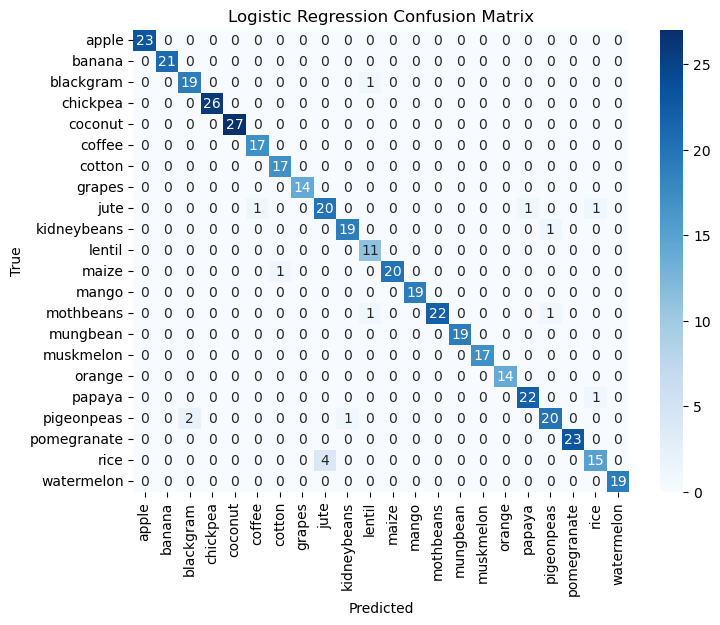

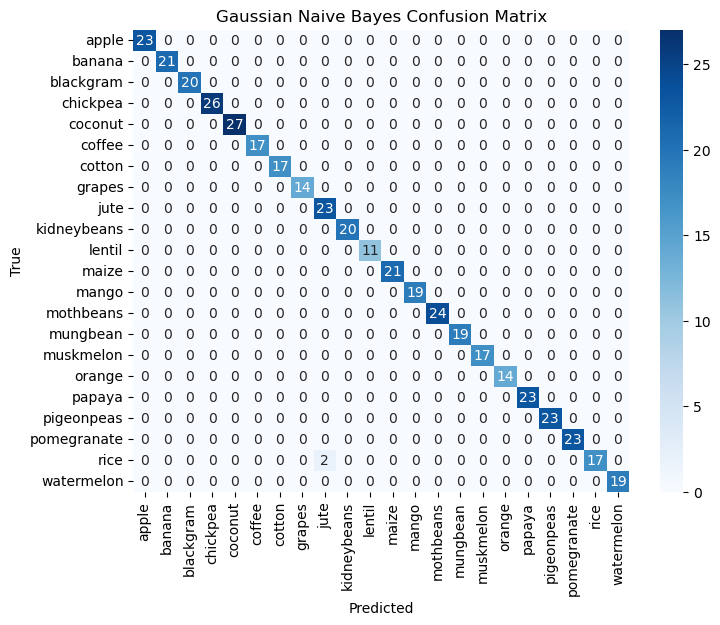

In [13]:
# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Confusion Matrix for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [15]:
# New data: temperature, humidity, soil pH, rainfall, N, P, K (example values)
new_data = np.array([[30, 60, 6.5, 100, 80, 60, 50]])  # Example: 30°C, 60% humidity, pH 6.5, 100mm rainfall, N=80, P=60, K=50

# Scale the new data using the same scaler as used for training data
new_data_scaled = scaler.transform(new_data)

# Predict the crop using the trained Logistic Regression model
predicted_crop = lr_model.predict(new_data_scaled)

# Print the predicted crop
print(f"The recommended crop for these conditions is: {predicted_crop[0]}")


The recommended crop for these conditions is: papaya


C:\Users\chavv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
import joblib

# Save trained model
joblib.dump(lr_model, 'crop_recommendation_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


C:\Users\chavv\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
joblib.dump(lr_model, 'crop_recommendation_model.pkl')


['crop_recommendation_model.pkl']

In [20]:
import os
print(os.getcwd())


C:\Users\chavv
